# ML4SCI Task 3.2

**Converting array of (8,) into (4,125,125) and making the dataset and dataloader**

 **the array (8,) contains each element as array of 125 elements which inturn is an array of 125 elements**

#  End-to-End Deep Learning Regression for Measurements with the CMS Experiment

In [1]:
# importing basic modules"
import pandas as pd
import numpy as np


**Lets import the data.....**

**We find that the data is toooo huge and normal pd.read_parquet('') causes cpu overload and hence doesnt get read**

**SO WHAT IS MY APPRACH??**

**I ran a for loop from 0 to total rows with step size of chunk_size variable
Then reading the ith elementand converting it into pandas
Lastly appending them all to form the dataFrame
TO SET THE NUMBER OF EXAMPLES TO EXTRACT**

**If u set the value of chunk size as n , then u will get total rows//n number of examples**

In [20]:
import pyarrow.parquet as pq
# Set the size of each chunk in rows
chunk_size = 50

# Create a Parquet file reader object
parquet_file = pq.ParquetFile('/kaggle/input/ml4sci-regression-dataset/top_gun_opendata_3.parquet')

# Determine the total number of rows in the file
total_rows = parquet_file.metadata.num_rows

# Loop over the file in chunks
dfs = []
for i in range(0, total_rows, chunk_size):
    # Read a chunk of rows from the file
    chunk = parquet_file.read_row_group(i)
    df = chunk.to_pandas()
#     print(i)
    dfs.append(df)

# Concatenate all the DataFrames into a single DataFrame
final_df3 = pd.concat(dfs, ignore_index=True)


In [21]:
parquet_file.metadata    #Shows us what is there inside the parquet file

  created_by: parquet-cpp version 1.5.1-SNAPSHOT
  num_columns: 5
  num_rows: 150448
  num_row_groups: 150448
  format_version: 1.0
  serialized_size: 72299402

In [22]:
parquet_file.read_row_group(0).to_pandas()  # to convert into pandas 

,X_jet,m,iphi,pt,ieta
0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",232.846863,66.0,865.297302,26.0


In [23]:
final_df3['X_jet'][0].shape

(8,)

Above we see that the each element under the X_jets is just an array of 8 elements... but that 8 elements is it self an array of 125 elements where that 125 elements is an array of 125 elements

I created a function that stacks this and creates a 8,125,125 matrix

In [24]:
final_df3.head()


,X_jet,m,iphi,pt,ieta
0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",232.846863,66.0,865.297302,26.0
1,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",413.781799,53.0,962.853760,38.0
2,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",288.204926,63.0,926.835327,39.0
3,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",269.854034,44.0,656.809326,37.0
4,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",118.995079,46.0,411.588104,38.0


In [25]:
total_rows

150448

In [26]:
final_df3['X_jet'][0].shape


(8,)

# created function to convert 

In [27]:
def to_3d(arr):
    vishak=[]
    for i in range (0,4):
        vis=np.stack(np.stack(arr)[i],axis=-1)
        vishak.append(vis)
    vishak=np.array(vishak)
    return vishak


In [28]:
rr=final_df3['X_jet'].shape[0]

In [29]:
for i in range (0,rr):
    final_df3['X_jet'][i]=to_3d(final_df3['X_jet'][i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
final_df3['X_jet'][0].shape

(4, 125, 125)

**So we see that our dataframe final_df now has a column called X_jets which contains 8,125,125 sized matrix**

In [31]:
import matplotlib.pyplot as plt

**Lets plot and see how the image looks like**

# visualizing the data

Mass is =232.84686279296875


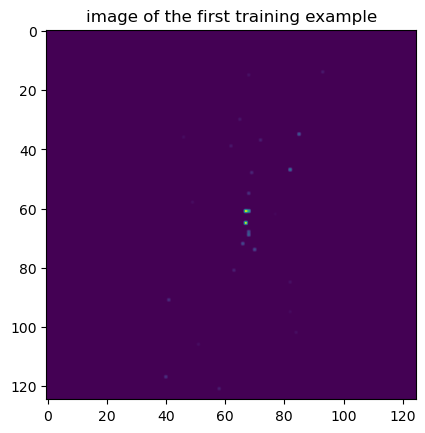

In [32]:
plt.imshow(final_df3['X_jet'][0][0,:,:])


plt.title("image of the first training example");
label=final_df3['m'][0]
print(f"Mass is ={label}")

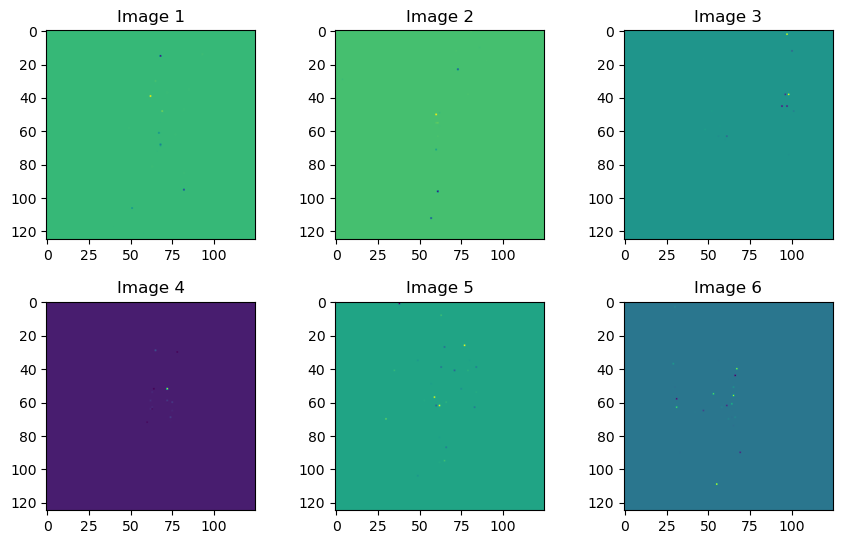

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Loop over the axes and image ids, and plot each image on a separate subplot
for i, ax in enumerate(axes.flatten()):
    image = final_df3['X_jet'][i][2,:,:]
    ax.imshow(image)
    ax.set_title(f'Image {i+1}')
    
# Adjust spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

# Show the plot
plt.show()

**the plot of the mass lets plot the histogram**

<AxesSubplot:>

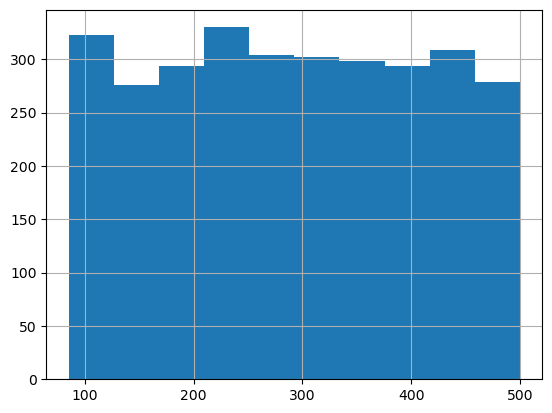

In [34]:
final_df3['m'].hist()

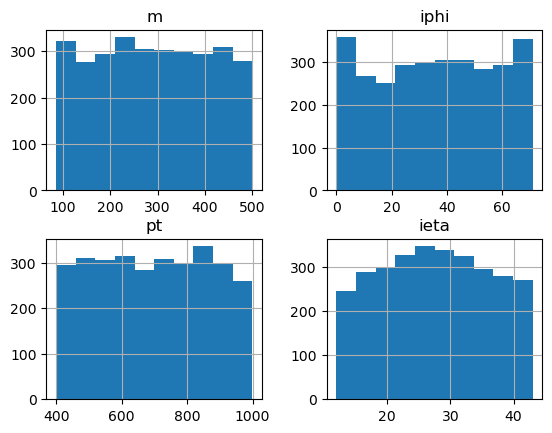

In [35]:
final_df3.hist();

**Lets scale the data using standard scaler**

**THis function below scales the values**

In [36]:
from sklearn.preprocessing import StandardScaler


def scale_matrix(matrix):
    """
    Scale the pixel values of a 3D numpy array using the StandardScaler.

    Parameters:
    matrix (numpy.ndarray): A 3D numpy array of shape (n_samples, height, width).

    Returns:
    numpy.ndarray: A 3D numpy array of the same shape as input, with scaled pixel values.
    """
    # Reshape the matrix to a 2D array
    reshaped_matrix = matrix.reshape(matrix.shape[0], -1)

    # Initialize the StandardScaler object
    scaler = StandardScaler()

    # Scale the pixel values of the matrix
    scaled_matrix = scaler.fit_transform(reshaped_matrix)

    # Reshape the scaled matrix back to its original shape
    scaled_matrix = scaled_matrix.reshape(matrix.shape)

    return scaled_matrix

In [37]:
for i in range (0,rr):
    final_df3['X_jet'][i]=scale_matrix(final_df3['X_jet'][i]);

/opt/conda/lib/python3.7/site-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Dataset and DataLoader

**Splitting the data into train and test set in ratio 80/100**

In [38]:
from sklearn.model_selection import train_test_split 

In [39]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader , random_split

In [40]:
final_df3.head()

,X_jet,m,iphi,pt,ieta
0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",232.846863,66.0,865.297302,26.0
1,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",413.781799,53.0,962.853760,38.0
2,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",288.204926,63.0,926.835327,39.0
3,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",269.854034,44.0,656.809326,37.0
4,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",118.995079,46.0,411.588104,38.0


**DataSet Description: 125x125 image matrices with name of variables: ieta and iphi, with 4 channels called X_jet (Track pT, DZ and D0, ECAL). Please use at least ECAL and Track pT channels and ‘am‘ as the target feature. Please train your model on 80% of the data and evaluate on the remaining 20%. Please make sure not to overfit on the test dataset - it will be checked with an independent sample.**

**electromagnetic calorimeter (ECAL)**

**momentum pT > 20 GeV**

In [41]:
Dataset

torch.utils.data.dataset.Dataset

In [42]:
class regdataset(Dataset):
    
    def __init__(self,data):
        self.df= data
        self.X= data['X_jet']
        self.y=data['m']
        
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        return torch.tensor(self.X[idx],dtype=torch.float32), torch.tensor(self.y[idx],dtype=torch.float32)
    

**create the instance of the above class**

In [43]:
train_data=regdataset(final_df3)

In [44]:
next(iter(train_data))[0].shape

torch.Size([4, 125, 125])

**Splitting the data into train and test set in ratio 80/100**

In [45]:
train_size = int(0.8 * len(train_data))  # use 80% of data for training
test_size = len(train_data) - train_size  # use remaining 20% for testing
train_dataset, test_dataset = random_split(train_data, [train_size, test_size])  # split dataset into train and test

# DataLoader

In [46]:
train_loader= DataLoader(train_dataset, batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=True)

In [47]:
next(iter(train_loader))[0].shape

torch.Size([32, 4, 125, 125])

# Architecture

In [52]:
import torch.nn.functional as F

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.conv1 = nn.Conv2d(4, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 31 * 31, 256)
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x = x.view(-1, 64 * 31 * 31)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x.squeeze()


In [53]:
model= RegressionModel()

In [56]:
model(next(iter(train_loader))[0])

tensor([0.0097, 0.0127, 0.0119, 0.0056, 0.0104, 0.0051, 0.0070, 0.0089, 0.0122,
        0.0087, 0.0083, 0.0062, 0.0055, 0.0133, 0.0101, 0.0114, 0.0092, 0.0046,
        0.0086, 0.0115, 0.0110, 0.0155, 0.0217, 0.0145, 0.0119, 0.0135, 0.0069,
        0.0128, 0.0191, 0.0130, 0.0147, 0.0123], grad_fn=<SqueezeBackward0>)

In [57]:
final_df3['X_jet'][0].shape

(4, 125, 125)

# Training Loop

In [82]:
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Instantiate the model and move it to the GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RegressionModel().to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [109]:
model_state_dict = torch.load('/kaggle/working/checkpoint_epoch20.pth')['model']

# Load the saved state_dict
model.load_state_dict(model_state_dict)

<All keys matched successfully>

[Epoch 1, Batch 1] Loss: 153.510
[Epoch 2, Batch 1] Loss: 74.120
[Epoch 3, Batch 1] Loss: 144.523
[Epoch 4, Batch 1] Loss: 119.168
[Epoch 5, Batch 1] Loss: 83.565


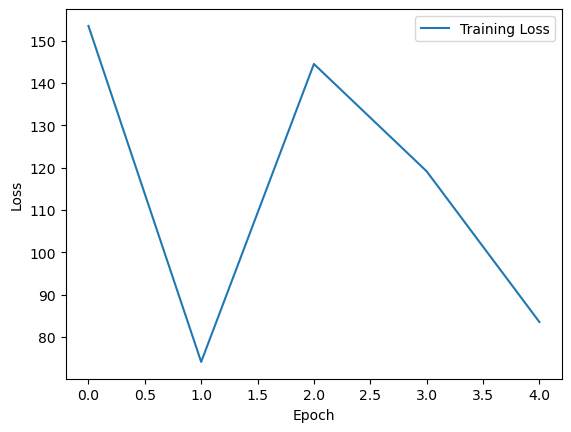

In [90]:
# Training loop
num_epochs = 5
train_losses = []
for epoch in range(num_epochs):
    flag=0
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # move to GPU if available
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Print statistics every 100 mini-batches
        if (flag==0):
            print('[Epoch %d, Batch %d] Loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / len(train_loader)))
            train_losses.append(running_loss / len(train_loader))
            running_loss = 0.0
            flag=1
    
    # Save model checkpoint after each epoch
#     checkpoint = {
#         'model': model.state_dict(),
#         'optimizer': optimizer.state_dict(),
#         'epoch': epoch + 1,
#         'train_losses': train_losses
#     }
#     torch.save(checkpoint, f'checkpoint_epoch{epoch+1}.pth')
    
# Plot learning curve
plt.plot( train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [91]:
# Save model checkpoint after each epoch
checkpoint = {
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict(),
        'epoch': epoch + 1,
        'train_losses': train_losses
    }
torch.save(checkpoint, f'checkpoint_epoch{epoch+1}.pth')

In [92]:
epoch

4

In [93]:
model(next(iter(train_loader))[0].to(device))

tensor([471.8888, 279.9029, 277.7546, 274.4968, 251.9696, 162.9466, 306.3516,
        301.8897, 388.4455, 274.2234, 274.9473, 300.4969, 264.4630, 318.0904,
        275.2048, 470.1100, 206.7000, 319.9237, 269.8929, 420.4942, 472.6387,
        257.5468, 261.6323, 352.6745, 162.2177, 168.9116, 268.5382, 259.6030,
        257.7735, 302.7849, 172.7616, 155.4103], device='cuda:0',
       grad_fn=<SqueezeBackward0>)

In [94]:
next(iter(train_loader))[1]

tensor([403.6158, 490.6981, 402.5923, 367.9812, 415.8146, 219.4500, 222.5574,
        251.6791, 276.5468, 381.8850, 221.5687, 208.9986, 153.3036, 282.8660,
        258.0343, 176.8999, 138.2467, 388.2806, 401.5501, 429.7057, 369.3040,
        466.6577, 477.6188, 316.0166, 385.8481, 187.2014, 288.4980, 120.7616,
        401.0101, 444.4043, 279.8681, 499.8500])

# Final loss on train data

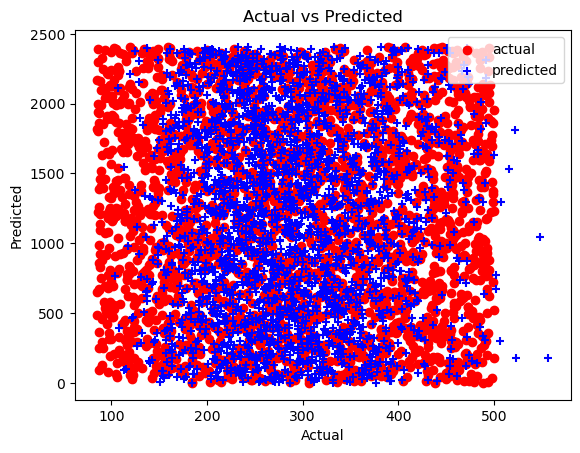

In [95]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set the model to evaluation mode for testing
model.eval()

# Lists to store actual and predicted values
y_true = []
y_pred = []

# Disable gradient calculation during testing
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(train_loader):
        # Move data to device
        data, target = data.to(device), target.to(device)
        
        # Forward pass to get predicted output
        output = model(data)
        
        # Append actual and predicted values to the lists
        y_true.extend(target.cpu().numpy().tolist())
        y_pred.extend(output.cpu().numpy().tolist())

# Plot the actual vs predicted values with actual values in blue and predicted values in red
plt.scatter(y_true, range(len(train_dataset)), color='red',label='actual')
plt.scatter(y_pred, range(len(train_dataset)), color='blue',marker='+',label="predicted")
# plt.scatter(x, y, marker='+')
# plt.plot([min(y_true+y_pred), max(y_true+y_pred)], [min(y_true+y_pred), max(y_true+y_pred)], color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.title('Actual vs Predicted')
plt.show()

**lets see the MSE of the train data**

In [96]:
criterion(torch.tensor(y_pred),torch.tensor(y_true))

tensor(6858.3896)

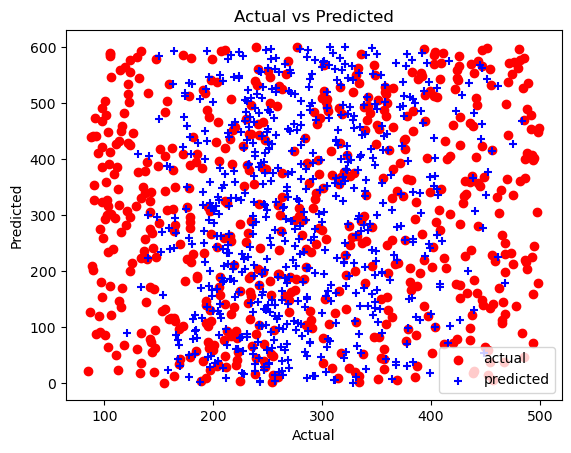

In [97]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set the model to evaluation mode for testing
model.eval()

# Lists to store actual and predicted values
y_true = []
y_pred = []

# Disable gradient calculation during testing
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        # Move data to device
        data, target = data.to(device), target.to(device)
        
        # Forward pass to get predicted output
        output = model(data)
        
        # Append actual and predicted values to the lists
        y_true.extend(target.cpu().numpy().tolist())
        y_pred.extend(output.cpu().numpy().tolist())

# Plot the actual vs predicted values with actual values in blue and predicted values in red
plt.scatter(y_true, range(len(test_dataset)), color='red',label='actual')
plt.scatter(y_pred, range(len(test_dataset)), color='blue',marker='+',label="predicted")
# plt.scatter(x, y, marker='+')
# plt.plot([min(y_true+y_pred), max(y_true+y_pred)], [min(y_true+y_pred), max(y_true+y_pred)], color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

plt.title('Actual vs Predicted')
plt.show()


**Above we see that the actual values are marked by the red dots and the predicted values are marked by blue +**

**we are able to see closeness in overlapping**

In [98]:
#lets see the MSE of the test data

In [99]:
criterion(torch.tensor(y_pred),torch.tensor(y_true))

tensor(11195.8789)